# Higher Education Types in the East and West regions of the USA

**by Phuc (Peter) Luong**

<img src="https://www.azdisabilitylaw.org/wp-content/uploads/2019/08/education.jpg"
     width="400" height="100">
***


## **Section 1: Background**
* International students and out-of-state domestic students often would like to have a thorough understanding of the US university system before enrolling. Besides ranks and popularity, specific majors and academic types play important roles in the students’ decisions to attend college. 
* In addition to students, policy makers and educators are also interested in learning more about the academic distribution of a region before establishing new institutions. This knowledge helps not only compete with other universities and colleges, but also to have an overall understanding of the general demand of the local areas.
* However, one often wonders if there is a difference between different US regions regarding specified education subjects. In other words, the paper examines whether there is a significant difference in academic type distribution of colleges and universities between the eastern and western regions of the US. “Are we more likely to see Technology-focused majors in the East coast relative to the West coast?” is an example of one of the interested questions.
* For this project, I am going to utilize Foursquare API to find location data of higher education venues throughout the East and West of the US. By using Foursquare API, I am also able to find location of university departments and their respective categories. The choices of region are completely arbitrary. Furthermore, five cities are drawn randomly for each region and Foursquare API will help obtain information about the academic type distribution of nearby cities and towns that house the corresponding universities. Later on, I will test formally, using Chi-square test for independence and multinomial logistic regression, to understand whether demographic characteristics of a region can predict the categorization of the higher education subjects of that region. 

***

## **Section 2: Data Collection and Features**

In [1]:
# library to handle data in a vectorized manner
import numpy as np 
# pandas to analyze dataframes
import pandas as pd 
# remove limits of data browsing
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# library to handle JSON files
import json 
# library to handle requests
import requests 
# tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize 

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)

# !pip install researchpy 
# helps with statistical inference (this is also better at displaying results than scipy)
import researchpy

# library for statistics/ inferential analysis
# install if haven't done so: !pip install scipy.stats
import scipy
import scipy.stats

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!pip install folium (if haven't already done so)
# map rendering library
import folium 

print('Libraries imported.')

Libraries imported.


The following code is a courtesy from Coursera IBM Data Science Capstone Project. This code is particularly used for scraping categories information data information from JSON file

In [2]:
# function that extracts the category of the venue from Foursquare API
# the original JSON file returns a venue's categories as: categorie: name: ... , shortName: ..., id: ....
# we're only interested in getting the name/short name of that category

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [3]:
# similarly but with shortName for later analysis
def get_category_short(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['shortName']

For the locations and demographic data of unincorporated cities and towns, I scraped data and manually filled some data points in an excel table containing relevant information. In addition to Foursquare API, I used sources from the following websites: Wikipedia, Google Maps and [https://simplemaps.com/](https://simplemaps.com/). The data tables can also be accessed through my Github account. 

In [4]:
df_info = pd.read_csv('https://raw.githubusercontent.com/putalo/IBM-project/master/uscities.csv',header=0)
display(df_info.shape)
df_info.head()

(28889, 19)

,city,city_ascii,state_id,state_name,county_fips,county_name,county_fips_all,county_name_all,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,South Creek,South Creek,WA,Washington,53053,Pierce,53053,Pierce,46.9994,-122.3921,2500.0,125.0,polygon,False,True,America/Los_Angeles,3,98580 98387 98338,1840042075
1,Roslyn,Roslyn,WA,Washington,53037,Kittitas,53037,Kittitas,47.2507,-121.0989,947.0,84.0,polygon,False,True,America/Los_Angeles,3,98941 98068 98925,1840019842
2,Sprague,Sprague,WA,Washington,53043,Lincoln,53043,Lincoln,47.3048,-117.9713,441.0,163.0,polygon,False,True,America/Los_Angeles,3,99032,1840021107
3,Gig Harbor,Gig Harbor,WA,Washington,53053,Pierce,53053,Pierce,47.3352,-122.5968,9507.0,622.0,polygon,False,True,America/Los_Angeles,3,98332 98335,1840019855
4,Lake Cassidy,Lake Cassidy,WA,Washington,53061,Snohomish,53061,Snohomish,48.0639,-122.0920,3591.0,131.0,polygon,False,True,America/Los_Angeles,3,98223 98258 98270,1840041959


In [5]:
# keeping relevant variables for analysis
df_info = df_info[['city','state_id','lat','lng','population','density']]
df_info.rename(columns={'state_id': 'state', 'lat':'lat_city','lng':'lng_city'}, inplace=True)
df_info.head()

,city,state,lat_city,lng_city,population,density
0,South Creek,WA,46.9994,-122.3921,2500.0,125.0
1,Roslyn,WA,47.2507,-121.0989,947.0,84.0
2,Sprague,WA,47.3048,-117.9713,441.0,163.0
3,Gig Harbor,WA,47.3352,-122.5968,9507.0,622.0
4,Lake Cassidy,WA,48.0639,-122.0920,3591.0,131.0


**College Academic Building**: 4bf58dd8d48988d198941735

* **College Arts Building**: 4bf58dd8d48988d199941735
* **College Communications Building**: 4bf58dd8d48988d19a941735
* **College Engineering Building**: 4bf58dd8d48988d19e941735
* **College History Building**: 4bf58dd8d48988d19d941735
* **College Math Building**: 4bf58dd8d48988d19c941735
* **College Science Building**: 4bf58dd8d48988d19b941735
* **College Technology Building**: 4bf58dd8d48988d19f941735

In [6]:
# Storing info to use for the rest of Foursquare API search
CLIENT_ID = 'O21VRXRAQKNHZ4RNQQ3ALNR1PTYARC4XTRI4OHLOPHNC31B4' # Foursquare ID
CLIENT_SECRET = '0W3HDXRJTDPU3ABNLVO20JR1BLMOMHPQH2ZGT3GJQSTD11PL' # Foursquare Secret
VERSION = '20180605' # Foursquare API version
radius= 99990  # in meters
LIMIT = 500    # search limits
categoryId= '4bf58dd8d48988d199941735,4bf58dd8d48988d19a941735,4bf58dd8d48988d19e941735,4bf58dd8d48988d19d941735,4bf58dd8d48988d19c941735,4bf58dd8d48988d19b941735,4bf58dd8d48988d19f941735'  
# these are the 7 subcategories of 'Academic Building' from Foursquare API, which I am interested in for this analysis. Please also refer to Foursquare API categories for more information.

***

# Five Populated Eastern Cities

### **New York City, NY, USA**
Coordinates (lattitude and longitude): 40.6635°N 73.9387°W

In [7]:
# searching college and universities in NY, NY, USA
url1A = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&categoryId={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET, categoryId,VERSION, 40.6635, -73.9387, radius, LIMIT)

url1B = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&categoryId={}&v={}&ll={},{}&radius={}&offset=100&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET, categoryId,VERSION, 40.6635, -73.9387, radius, LIMIT)

url1C = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&categoryId={}&v={}&ll={},{}&radius={}&offset=200&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET,  categoryId,VERSION, 40.6635, -73.9387, radius, LIMIT)

In [8]:
results1A = requests.get(url1A).json()
results1B = requests.get(url1B).json()
results1C = requests.get(url1C).json()

In [9]:
search1A = results1A['response']['groups'][0]['items']
df_e1A = pd.json_normalize(search1A) # flatten JSON
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng', 'venue.location.city', 'venue.location.state']
df_e1A =df_e1A.loc[:, filtered_columns]
# filter the category for each row
df_e1A['education type'] = df_e1A.apply(get_category_short, axis=1)
df_e1A['venue.categories'] = df_e1A.apply(get_category_type, axis=1)
# clean columns
df_e1A.columns = [col.split(".")[-1] for col in df_e1A.columns]

In [10]:
search1B = results1B['response']['groups'][0]['items']
df_e1B = pd.json_normalize(search1B) # flatten JSON
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng', 'venue.location.city', 'venue.location.state']
df_e1B =df_e1B.loc[:, filtered_columns]
# filter the category for each row
df_e1B['education type'] = df_e1B.apply(get_category_short, axis=1)
df_e1B['venue.categories'] = df_e1B.apply(get_category_type, axis=1)
# clean columns
df_e1B.columns = [col.split(".")[-1] for col in df_e1B.columns]

In [11]:
search1C = results1C['response']['groups'][0]['items']
df_e1C = pd.json_normalize(search1C) # flatten JSON
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng', 'venue.location.city', 'venue.location.state']
df_e1C =df_e1C.loc[:, filtered_columns]
# filter the category for each row
df_e1C['education type'] = df_e1C.apply(get_category_short, axis=1)
df_e1C['venue.categories'] = df_e1C.apply(get_category_type, axis=1)
# clean columns
df_e1C.columns = [col.split(".")[-1] for col in df_e1C.columns]

In [12]:
df_east1=pd.concat([df_e1A, df_e1B, df_e1C]).drop_duplicates().reset_index(drop=True)

(247, 7)


,name,categories,lat,lng,city,state,education type
0,The Juilliard School,College Arts Building,40.773749,-73.982829,New York,NY,Arts
1,Sotheby's,Art Gallery,40.766494,-73.954003,New York,NY,Art Gallery
2,The Invisible Dog,Art Gallery,40.687191,-73.991130,Brooklyn,NY,Art Gallery
3,Lincoln Center for the Performing Arts,Performing Arts Venue,40.772282,-73.982948,New York,NY,Performing Arts
4,The Morgan Library & Museum,Museum,40.749305,-73.981429,New York,NY,Museum


### **Washington, D.C., USA**
Coordinates (lattitude, longitude): 38.9041°N 77.0172°W

In [13]:
# searching college and universities in Washington, D.C., USA
url2A = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&categoryId={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET, categoryId,VERSION, 38.9041, -77.0172, radius, LIMIT)

url2B = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&categoryId={}&v={}&ll={},{}&radius={}&offset=100&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET, categoryId,VERSION, 38.9041, -77.0172, radius, LIMIT)

url2C = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&categoryId={}&v={}&ll={},{}&radius={}&offset=200&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET, categoryId, VERSION, 38.9041, -77.0172, radius, LIMIT)

In [14]:
results2A = requests.get(url2A).json()
results2B = requests.get(url2B).json()
results2C = requests.get(url2C).json()
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng', 'venue.location.city', 'venue.location.state']

In [15]:
search2A = results2A['response']['groups'][0]['items']
df_e2A = pd.json_normalize(search2A) # flatten JSON
# filter columns
df_e2A =df_e2A.loc[:, filtered_columns]
# filter the category for each row
df_e2A['education type'] = df_e2A.apply(get_category_short, axis=1)
df_e2A['venue.categories'] = df_e2A.apply(get_category_type, axis=1)
# clean columns
df_e2A.columns = [col.split(".")[-1] for col in df_e2A.columns]

In [16]:
search2B = results2B['response']['groups'][0]['items']
df_e2B = pd.json_normalize(search2B) # flatten JSON
# filter columns
df_e2B =df_e2B.loc[:, filtered_columns]
# filter the category for each row
df_e2B['education type'] = df_e2B.apply(get_category_short, axis=1)
df_e2B['venue.categories'] = df_e2B.apply(get_category_type, axis=1)
# clean columns
df_e2B.columns = [col.split(".")[-1] for col in df_e2B.columns]

In [17]:
search2C = results2C['response']['groups'][0]['items']
df_e2C = pd.json_normalize(search2C) # flatten JSON
# filter columns
df_e2C =df_e2C.loc[:, filtered_columns]
# filter the category for each row
df_e2C['education type'] = df_e2C.apply(get_category_short, axis=1)
df_e2C['venue.categories'] = df_e2C.apply(get_category_type, axis=1)
# clean columns
df_e2C.columns = [col.split(".")[-1] for col in df_e2C.columns]

In [18]:
df_east2=pd.concat([df_e2A,df_e2B, df_e2C]).drop_duplicates().reset_index(drop=True)
print(df_east2.shape)

(213, 7)


,name,categories,lat,lng,city,state,education type
0,Smithsonian American Art Museum,Art Museum,38.897746,-77.022979,Washington,D.C.,Art Museum
1,Torpedo Factory Art Center,Art Gallery,38.804865,-77.039905,Alexandria,VA,Art Gallery
2,The Phillips Collection,Art Museum,38.911796,-77.046744,Washington,D.C.,Art Museum
3,AU – Cyrus and Myrtle Katzen Arts Center,College Arts Building,38.939180,-77.087329,Washington,D.C.,Arts
4,Blind Whino,Art Gallery,38.880439,-77.012033,Washington,D.C.,Art Gallery


### **Philadelphia, PA, USA**
Coordinates (lattitude and longitude): 40.0094°N 75.1333°W

In [19]:
# searching college and universities in Washington, D.C., USA
url3A = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&categoryId={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET, categoryId,VERSION, 40.0094, -75.1333, radius, LIMIT)

url3B = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&categoryId={}&v={}&ll={},{}&radius={}&offset=100&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET, categoryId,VERSION, 40.0094, -75.1333, radius, LIMIT)

## Philadelphia only has up to 193 results

In [20]:
results3A = requests.get(url3A).json()
results3B = requests.get(url3B).json()

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng', 'venue.location.city', 'venue.location.state']

In [21]:
search3A = results3A['response']['groups'][0]['items']
df_e3A = pd.json_normalize(search3A) # flatten JSON
# filter columns
df_e3A =df_e3A.loc[:, filtered_columns]
# filter the category for each row
df_e3A['education type'] = df_e3A.apply(get_category_short, axis=1)
df_e3A['venue.categories'] = df_e3A.apply(get_category_type, axis=1)
# clean columns
df_e3A.columns = [col.split(".")[-1] for col in df_e3A.columns]

In [22]:
search3B = results3B['response']['groups'][0]['items']
df_e3B = pd.json_normalize(search3B) # flatten JSON
# filter columns
df_e3B =df_e3B.loc[:, filtered_columns]
# filter the category for each row
df_e3B['education type'] = df_e3B.apply(get_category_short, axis=1)
df_e3B['venue.categories'] = df_e3B.apply(get_category_type, axis=1)
# clean columns
df_e3B.columns = [col.split(".")[-1] for col in df_e3B.columns]

In [23]:
df_east3=pd.concat([df_e3A,df_e3B]).drop_duplicates().reset_index(drop=True)
print(df_east3.shape)

(185, 7)


,name,categories,lat,lng,city,state,education type
0,Philadelphia's Magic Gardens,Sculpture Garden,39.942818,-75.159333,Philadelphia,PA,Sculpture
1,Fleisher Art Memorial,Art Gallery,39.939205,-75.155323,Philadelphia,PA,Art Gallery
2,Merriam Theater - University of the Arts,Theater,39.947610,-75.164673,Philadelphia,PA,Theater
3,Lang Performing Arts Center,Performing Arts Venue,39.905475,-75.355396,Swarthmore,PA,Performing Arts
4,Vox Populi - Music Gallery,Art Gallery,39.958330,-75.156880,Philadelphia,PA,Art Gallery


### **Boston, MA, USA**
42.3320°N 71.0202°W

In [24]:
# searching college and universities in Washington, D.C., USA
url7A = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&categoryId={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET, categoryId, VERSION, 42.3320, -71.0202, radius, LIMIT)

url7B = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&categoryId={}&v={}&ll={},{}&radius={}&offset=100&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET, categoryId,VERSION, 42.3320, -71.0202, radius, LIMIT)

## Philadelphia only has up to 199 results

In [25]:
results7A = requests.get(url7A).json()
results7B = requests.get(url7B).json()

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng', 'venue.location.city', 'venue.location.state']

In [26]:
search7A = results7A['response']['groups'][0]['items']
df_e4A = pd.json_normalize(search7A) # flatten JSON
# filter columns
df_e4A =df_e4A.loc[:, filtered_columns]
# filter the category for each row
df_e4A['education type'] = df_e4A.apply(get_category_short, axis=1)
df_e4A['venue.categories'] = df_e4A.apply(get_category_type, axis=1)
# clean columns
df_e4A.columns = [col.split(".")[-1] for col in df_e4A.columns]

In [27]:
search7B = results7B['response']['groups'][0]['items']
df_e4B = pd.json_normalize(search7B) # flatten JSON
# filter columns
df_e4B =df_e4B.loc[:, filtered_columns]
# filter the category for each row
df_e4B['education type'] = df_e4B.apply(get_category_short, axis=1)
df_e4B['venue.categories'] = df_e4B.apply(get_category_type, axis=1)
# clean columns
df_e4B.columns = [col.split(".")[-1] for col in df_e4B.columns]

In [28]:
df_east4=pd.concat([df_e4A,df_e4B]).drop_duplicates().reset_index(drop=True)
print(df_east4.shape)

(200, 7)


,name,categories,lat,lng,city,state,education type
0,Berkman Klein Center for Internet & Society,College Technology Building,42.380153,-71.117954,Cambridge,MA,Technology
1,Harvard Art Museums,Art Museum,42.374206,-71.114368,Cambridge,MA,Art Museum
2,Peabody Essex Museum (PEM),Art Gallery,42.521730,-70.892360,Salem,MA,Art Gallery
3,Loeb Drama Center (A.R.T),Theater,42.374968,-71.122686,Cambridge,MA,Theater
4,Art of the Americas @ MFA,Art Gallery,42.339693,-71.093940,Boston,MA,Art Gallery


### **Baltimore, MD, USA**
39.3000°N 76.6105°W

In [29]:
# searching college and universities in Washington, D.C., USA
url8A = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&categoryId={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET, categoryId,VERSION, 39.3000, -76.6105, radius, LIMIT)

url8B = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&categoryId={}&v={}&ll={},{}&radius={}&offset=100&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET, categoryId,VERSION, 39.3000, -76.6105, radius, LIMIT)

url8C = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&categoryId={}&v={}&ll={},{}&radius={}&offset=200&limit={}'.format(
    CLIENT_ID,  CLIENT_SECRET, categoryId,VERSION, 39.3000, -76.6105, radius, LIMIT)

In [30]:
results8A = requests.get(url8A).json()
results8B = requests.get(url8B).json()
results8C = requests.get(url8C).json()
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng', 'venue.location.city', 'venue.location.state']

In [31]:
search8A = results8A['response']['groups'][0]['items']
df_e5A = pd.json_normalize(search8A) # flatten JSON
# filter columns
df_e5A =df_e5A.loc[:, filtered_columns]
# filter the category for each row
df_e5A['education type'] = df_e5A.apply(get_category_short, axis=1)
df_e5A['venue.categories'] = df_e5A.apply(get_category_type, axis=1)
# clean columns
df_e5A.columns = [col.split(".")[-1] for col in df_e5A.columns]

In [32]:
search8B = results8B['response']['groups'][0]['items']
df_e5B = pd.json_normalize(search8B) # flatten JSON
# filter columns
df_e5B =df_e5B.loc[:, filtered_columns]
# filter the category for each row
df_e5B['education type'] = df_e5B.apply(get_category_short, axis=1)
df_e5B['venue.categories'] = df_e5B.apply(get_category_type, axis=1)
# clean columns
df_e5B.columns = [col.split(".")[-1] for col in df_e5B.columns]

In [33]:
search8C = results8C['response']['groups'][0]['items']
df_e5C = pd.json_normalize(search8C) # flatten JSON
# filter columns
df_e5C =df_e5C.loc[:, filtered_columns]
# filter the category for each row
df_e5C['education type'] = df_e5C.apply(get_category_short, axis=1)
df_e5C['venue.categories'] = df_e5C.apply(get_category_type, axis=1)
# clean columns
df_e5C.columns = [col.split(".")[-1] for col in df_e5C.columns]

,name,categories,lat,lng,city,state,education type
0,Brentwood Arts Exchange,Art Gallery,38.939354,-76.954567,Brentwood,MD,Art Gallery
1,Connersmith,Art Gallery,38.901329,-76.986092,Washington,D.C.,Art Gallery
2,Jackson Art Center,Art Gallery,38.912667,-77.060747,Washington,D.C.,Art Gallery
3,The Parliament,Art Gallery,39.961679,-76.724431,York,PA,Art Gallery
4,Duke Ellington School of the Arts,High School,38.913088,-77.069463,Washington,D.C.,High School
5,The Uptown Art House,Music Venue,38.934465,-77.058527,Washington,D.C.,Music Venue
6,East Coast Edge Performing Arts Center,Dance Studio,39.014427,-77.473541,Ashburn,VA,Dance Studio
7,U.S. General Services Administration (GSA),Government Building,38.896832,-77.042921,Washington,D.C.,Government


In [34]:
df_east5=pd.concat([df_e5A, df_e5B, df_e5C]).drop_duplicates().reset_index(drop=True)
print(df_east5.shape)

(208, 7)


In [35]:
# Combining data from the three popular cities in the east as 'df_east'
# ignoring index so that the index of combined will go from 0-299 instead of 0-99, then 0-99 ... etc
df_east=pd.concat([df_east1, df_east2, df_east3, df_east4, df_east5]).drop_duplicates().reset_index(drop=True)
df_east['region']='East'
print(df_east.shape)

(831, 8)


,name,categories,lat,lng,city,state,education type,region
0,The Juilliard School,College Arts Building,40.773749,-73.982829,New York,NY,Arts,East
1,Sotheby's,Art Gallery,40.766494,-73.954003,New York,NY,Art Gallery,East
2,The Invisible Dog,Art Gallery,40.687191,-73.991130,Brooklyn,NY,Art Gallery,East
3,Lincoln Center for the Performing Arts,Performing Arts Venue,40.772282,-73.982948,New York,NY,Performing Arts,East
4,The Morgan Library & Museum,Museum,40.749305,-73.981429,New York,NY,Museum,East


In [36]:
display(df_east1.shape[0]+ df_east2.shape[0]+ df_east3.shape[0]+ df_east4.shape[0]+df_east5.shape[0])

1053

***

# Five Populated Western Cities

### **Los Angeles, CA, USA**
Coordinates (lattitude, longitude): 34.0194°N 118.4108°W

In [37]:
# searching college and universities in Los Angeles, CA, USA
url4A = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&categoryId={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID,  CLIENT_SECRET,  categoryId,VERSION,  34.0194,  -118.4108, radius, LIMIT)

url4B = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&categoryId={}&v={}&ll={},{}&radius={}&offset=100&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET, categoryId,VERSION,  34.0194, -118.4108, radius,  LIMIT)

url4C = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&categoryId={}&v={}&ll={},{}&radius={}&offset=200&limit={}'.format(
    CLIENT_ID,  CLIENT_SECRET, categoryId, VERSION,  34.0194, -118.4108, radius,  LIMIT)

In [38]:
results4A = requests.get(url4A).json()
results4B = requests.get(url4B).json()
results4C = requests.get(url4C).json()
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng', 'venue.location.city', 'venue.location.state']

In [39]:
search4A = results4A['response']['groups'][0]['items']
df_w1A = pd.json_normalize(search4A) # flatten JSON
# filter columns
df_w1A = df_w1A.loc[:, filtered_columns]
# filter the category for each row
df_w1A['education type'] = df_w1A.apply(get_category_short, axis=1)
df_w1A['venue.categories'] = df_w1A.apply(get_category_type, axis=1)
# clean columns
df_w1A.columns = [col.split(".")[-1] for col in df_w1A.columns]

In [40]:
search4B = results4B['response']['groups'][0]['items']
df_w1B = pd.json_normalize(search4B) # flatten JSON
# filter columns
df_w1B =df_w1B.loc[:, filtered_columns]
# filter the category for each row
df_w1B['education type'] = df_w1B.apply(get_category_short, axis=1)
df_w1B['venue.categories'] = df_w1B.apply(get_category_type, axis=1)
# clean columns
df_w1B.columns = [col.split(".")[-1] for col in df_w1B.columns]

In [41]:
search4C = results4C['response']['groups'][0]['items']
df_w1C = pd.json_normalize(search4C) # flatten JSON
# filter columns
df_w1C =df_w1C.loc[:, filtered_columns]
# filter the category for each row
df_w1C['education type'] = df_w1C.apply(get_category_short, axis=1)
df_w1C['venue.categories'] = df_w1C.apply(get_category_type, axis=1)
# clean columns
df_w1C.columns = [col.split(".")[-1] for col in df_w1C.columns]

In [42]:
df_west1=pd.concat([df_w1A,df_w1B,df_w1C]).drop_duplicates().reset_index(drop=True)
print(df_west1.shape)

(209, 7)


,name,categories,lat,lng,city,state,education type
0,J. Paul Getty Villa,Art Museum,34.044751,-118.565165,Pacific Palisades,CA,Art Museum
1,Soap Plant and WACKO,Gift Shop,34.100304,-118.290046,Los Angeles,CA,Gift Shop
2,The Geffen Contemporary (MoCA),Art Gallery,34.050486,-118.238777,Los Angeles,CA,Art Gallery
3,Barnsdall Art Park,Park,34.102177,-118.293542,Los Angeles,CA,Park
4,MOCA,Art Museum,34.053327,-118.250762,Los Angeles,CA,Art Museum


### **San Jose, CA, USA**
Coordinates (lattitude, longitude): 37.2967°N 121.8189°W

In [43]:
# searching college and universities in Los Angeles, CA, USA
url5A = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&categoryId={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET, categoryId,VERSION, 37.2967, -121.8189, radius, LIMIT)

url5B = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&categoryId={}&v={}&ll={},{}&radius={}&offset=100&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET, categoryId,VERSION, 37.2967, -121.8189, radius, LIMIT)

url5C = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&categoryId={}&v={}&ll={},{}&radius={}&offset=200&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET, categoryId,VERSION, 37.2967, -121.8189, radius, LIMIT)

In [44]:
results5A = requests.get(url5A).json()
results5B = requests.get(url5B).json()
results5C = requests.get(url5C).json()
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng', 'venue.location.city', 'venue.location.state']

In [45]:
search5A = results5A['response']['groups'][0]['items']
df_w2A = pd.json_normalize(search5A) # flatten JSON
# filter columns
df_w2A = df_w2A.loc[:, filtered_columns]
# filter the category for each row
df_w2A['education type'] = df_w2A.apply(get_category_short, axis=1)
df_w2A['venue.categories'] = df_w2A.apply(get_category_type, axis=1)
# clean columns
df_w2A.columns = [col.split(".")[-1] for col in df_w2A.columns]

In [46]:
search5B = results5B['response']['groups'][0]['items']
df_w2B = pd.json_normalize(search5B) # flatten JSON
# filter columns
df_w2B = df_w2B.loc[:, filtered_columns]
# filter the category for each row
df_w2B['education type'] = df_w2B.apply(get_category_short, axis=1)
df_w2B['venue.categories'] = df_w2B.apply(get_category_type, axis=1)
# clean columns
df_w2B.columns = [col.split(".")[-1] for col in df_w2B.columns]

In [48]:
search5C = results5C['response']['groups'][0]['items']
df_w2C = pd.json_normalize(search5C) # flatten JSON
# filter columns
df_w2C = df_w2C.loc[:, filtered_columns]
# filter the category for each row
df_w2C['education type'] = df_w2C.apply(get_category_short, axis=1)
df_w2C['venue.categories'] = df_w2C.apply(get_category_type, axis=1)
# clean columns
df_w2C.columns = [col.split(".")[-1] for col in df_w2C.columns]

KeyError: "None of [Index(['venue.name', 'venue.categories', 'venue.location.lat',\n       'venue.location.lng', 'venue.location.city', 'venue.location.state'],\n      dtype='object')] are in the [columns]"

In [49]:
df_west2=pd.concat([df_w2A,df_w2B,df_w2C]).drop_duplicates().reset_index(drop=True)
print(df_west2.shape)

(200, 7)


,name,categories,lat,lng,city,state,education type
0,Local Color,Art Gallery,37.335554,-121.890349,San Jose,CA,Art Gallery
1,Hertz Concert Hall,College Arts Building,37.870978,-122.255775,Berkeley,CA,Arts
2,ANNO DOMINI Gallery,Art Gallery,37.330727,-121.886215,San Jose,CA,Art Gallery
3,111 Minna Gallery,Art Gallery,37.787488,-122.399274,San Francisco,CA,Art Gallery
4,Yerba Buena Center for the Arts,Art Museum,37.785484,-122.402451,San Francisco,CA,Art Museum


### **Phoenix, AZ, USA**
Coordinates (lattitude, longitude): 33.5722°N 112.0901°W

In [50]:
# searching college and universities in Phoenix, AZ, USA
url6A = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&categoryId={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET, categoryId,VERSION, 33.5722, -112.0901, radius, LIMIT)

url6B = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&categoryId={}&v={}&ll={},{}&radius={}&offset=100&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET, categoryId,VERSION, 33.5722, -112.0901, radius, LIMIT)

## only has 145 results

In [51]:
results6A = requests.get(url6A).json()
results6B = requests.get(url6B).json()

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng', 'venue.location.city', 'venue.location.state']

In [52]:
search6A = results6A['response']['groups'][0]['items']
df_w3A = pd.json_normalize(search6A) # flatten JSON
# filter columns
df_w3A = df_w3A.loc[:, filtered_columns]
# filter the category for each row
df_w3A['education type'] = df_w3A.apply(get_category_short, axis=1)
df_w3A['venue.categories'] = df_w3A.apply(get_category_type, axis=1)
# clean columns
df_w3A.columns = [col.split(".")[-1] for col in df_w3A.columns]

In [53]:
search6B = results6B['response']['groups'][0]['items']
df_w3B = pd.json_normalize(search6B) # flatten JSON
# filter columns
df_w3B = df_w3B.loc[:, filtered_columns]
# filter the category for each row
df_w3B['education type'] = df_w3B.apply(get_category_short, axis=1)
df_w3B['venue.categories'] = df_w3B.apply(get_category_type, axis=1)
# clean columns
df_w3B.columns = [col.split(".")[-1] for col in df_w3B.columns]

In [54]:
df_west3=pd.concat([df_w3A,df_w3B]).drop_duplicates().reset_index(drop=True)
print(df_west3.shape)

(157, 7)


,name,categories,lat,lng,city,state,education type
0,Mesa Arts Center,Performing Arts Venue,33.414232,-111.830248,Mesa,AZ,Performing Arts
1,Heard Museum,Museum,33.471737,-112.072247,Phoenix,AZ,Museum
2,First Friday,Art Gallery,33.458421,-112.068826,Phoenix,AZ,Art Gallery
3,Roosevelt Row District,Art Gallery,33.458637,-112.066899,Phoenix,AZ,Art Gallery
4,Scottsdale Art Walk,Art Gallery,33.493142,-111.926588,Phoenix,AZ,Art Gallery


### **Seattle, WA, USA**
Coordinates (lattitude, longitude): 47.6205°N 122.3509°W

In [55]:
# searching college and universities in Washington, D.C., USA
url9A = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&categoryId={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET, categoryId,VERSION, 47.6205, -122.3509, radius, LIMIT)

url9B = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&categoryId={}&v={}&ll={},{}&radius={}&offset=100&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET, categoryId,VERSION, 47.6205, -122.3509, radius, LIMIT)


In [56]:
results9A = requests.get(url9A).json()
results9B = requests.get(url9B).json()
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng', 'venue.location.city', 'venue.location.state']

In [57]:
search9A = results9A['response']['groups'][0]['items']
df_w4A = pd.json_normalize(search9A) # flatten JSON
# filter columns
df_w4A = df_w4A.loc[:, filtered_columns]
# filter the category for each row
df_w4A['education type'] = df_w4A.apply(get_category_short, axis=1)
df_w4A['venue.categories'] = df_w4A.apply(get_category_type, axis=1)
# clean columns
df_w4A.columns = [col.split(".")[-1] for col in df_w4A.columns]

In [58]:
search9B = results9B['response']['groups'][0]['items']
df_w4B = pd.json_normalize(search9B) # flatten JSON
# filter columns
df_w4B = df_w4B.loc[:, filtered_columns]
# filter the category for each row
df_w4B['education type'] = df_w4B.apply(get_category_short, axis=1)
df_w4B['venue.categories'] = df_w4B.apply(get_category_type, axis=1)
# clean columns
df_w4B.columns = [col.split(".")[-1] for col in df_w4B.columns]

In [59]:
df_west4=pd.concat([df_w4A,df_w4B]).drop_duplicates().reset_index(drop=True)
print(df_west4.shape)

(169, 7)


,name,categories,lat,lng,city,state,education type
0,Center for Urban Horticulture,College Science Building,47.657978,-122.290237,Seattle,WA,Science
1,Olympic Sculpture Park,Sculpture Garden,47.616365,-122.354781,Seattle,WA,Sculpture
2,Ghost Gallery,Art Gallery,47.613823,-122.317604,Seattle,WA,Art Gallery
3,Seattle Asian Art Museum,Art Museum,47.630161,-122.314564,Seattle,WA,Art Museum
4,Chihuly Bridge of Glass,Art Gallery,47.245620,-122.435285,Tacoma,WA,Art Gallery


### **Portland, OR, USA**
Coordinates (lattitude, longitude): 45.5370°N 122.6500°W

In [60]:
# searching college and universities in Washington, D.C., USA
url10A = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&categoryId={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET, categoryId,VERSION, 45.5370, -122.6500, radius, LIMIT)

url10B = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&categoryId={}&v={}&ll={},{}&radius={}&offset=100&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET, categoryId,VERSION, 45.5370, -122.6500, radius, LIMIT)

url10C = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&categoryId={}&v={}&ll={},{}&radius={}&offset=200&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET, categoryId,VERSION, 45.5370, -122.6500, radius, LIMIT)

In [61]:
results10A = requests.get(url10A).json()
results10B = requests.get(url10B).json()
results10C = requests.get(url10C).json()
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng', 'venue.location.city', 'venue.location.state']

In [62]:
search10A = results10A['response']['groups'][0]['items']
df_w5A = pd.json_normalize(search10A) # flatten JSON
# filter columns
df_w5A = df_w5A.loc[:, filtered_columns]
# filter the category for each row
df_w5A['education type'] = df_w5A.apply(get_category_short, axis=1)
df_w5A['venue.categories'] = df_w5A.apply(get_category_type, axis=1)
# clean columns
df_w5A.columns = [col.split(".")[-1] for col in df_w5A.columns]

In [63]:
search10B = results10B['response']['groups'][0]['items']
df_w5B = pd.json_normalize(search10B) # flatten JSON
# filter columns
df_w5B = df_w5B.loc[:, filtered_columns]
# filter the category for each row
df_w5B['education type'] = df_w5B.apply(get_category_short, axis=1)
df_w5B['venue.categories'] = df_w5B.apply(get_category_type, axis=1)
# clean columns
df_w5B.columns = [col.split(".")[-1] for col in df_w5B.columns]

In [64]:
df_west5=pd.concat([df_w5A,df_w5B]).drop_duplicates().reset_index(drop=True)
print(df_west5.shape)

(112, 7)


,name,categories,lat,lng,city,state,education type
0,Portland Art Museum,Art Museum,45.516230,-122.683597,Portland,OR,Art Museum
1,Ampersand Gallery & Fine Books,Art Gallery,45.559002,-122.635513,Portland,OR,Art Gallery
2,Art In The Pearl,Art Gallery,45.524751,-122.678909,Portland,OR,Art Gallery
3,Powell's City of Books,Bookstore,45.523180,-122.681375,Portland,OR,Bookstore
4,Robert Daniel Ryan,Art Gallery,45.374488,-122.205584,Sandy,OR,Art Gallery


In [65]:
# Combining data from the three populated cities in the east as 'df_east'
# ignoring index so that the index of combined will go from 0-299 instead of 0-99, then 0-99 ... etc
df_west=pd.concat([df_west1, df_west2, df_west3, df_west4, df_west5]).drop_duplicates().reset_index(drop=True)
df_west['region']='West'
print(df_west.shape)

(847, 8)


,name,categories,lat,lng,city,state,education type,region
0,J. Paul Getty Villa,Art Museum,34.044751,-118.565165,Pacific Palisades,CA,Art Museum,West
1,Soap Plant and WACKO,Gift Shop,34.100304,-118.290046,Los Angeles,CA,Gift Shop,West
2,The Geffen Contemporary (MoCA),Art Gallery,34.050486,-118.238777,Los Angeles,CA,Art Gallery,West
3,Barnsdall Art Park,Park,34.102177,-118.293542,Los Angeles,CA,Park,West
4,MOCA,Art Museum,34.053327,-118.250762,Los Angeles,CA,Art Museum,West


In [66]:
display(df_west1.shape[0]+ df_west2.shape[0]+ df_west3.shape[0]+ df_west4.shape[0]+df_west5.shape[0])

847

### Raw Concatenated Data

In [67]:
df_raw= pd.concat([df_east, df_west]).reset_index(drop=True)
df_raw.shape

(1678, 8)

Note that results of Foursquare API change everytime we do a new search, I ran the codes above recently (around 8/12 so the results are different)
<br>
For the rest of the analysis, I used the results from my search on 8/1/2020 (I stored the data files as df_raw and df_main)

***

## **Section 3: Research Methodology and Results**

### **PART 1: Data Cleansing**

### Restructing Data

The problem of using explore endpoint of Foursquare AP is getting some irrelevant results with Category ID as a parameter. So for simplicity I will drop data points with unrelated categories. But I will keep some general classification of higher education as "Other."

In [98]:
print(df_raw.shape)
df_raw['education type'].unique()

(1699, 8)


array(['Arts', 'Art Museum', 'Event Space', 'Art Gallery',
       'Performing Arts', 'Theater', 'Tattoo', 'Technology', 'Science',
       'Communications', 'History', 'Math', 'Academic Building',
       'High School', 'Engineering', 'University', 'Education',
       'Classroom', 'Student Center', 'Administrative Building',
       'Music Venue', 'Library', 'Design', 'Lab', 'Football',
       'Concert Hall', 'Community College', 'Office', 'School',
       'Trade School', 'Dance Studio', 'History Museum', 'Café',
       'Medical School', 'Government', 'Tech Startup', 'Martial Arts',
       'Sculpture', 'Beach', 'Auditorium', 'Middle School',
       'Science Museum', 'Arts & Crafts', 'Entertainment Service',
       'Residence Hall', 'Gift Shop', 'Park', 'Building', 'Public Art',
       'Museum', 'Medical Lab', 'Newsstand', 'Bank', 'Comic Shop',
       'Lounge', 'Bar', 'Deli / Bodega', 'Cafeteria', 'Plaza',
       'Coffee Shop', 'Indie Movies', 'Bookstore', 'Toys & Games', 'Mall',
       'Q

In [99]:
df_raw.head()

,name,categories,lat,lng,city,state,education type,region
0,The Juilliard School,College Arts Building,40.773749,-73.982829,New York,NY,Arts,East
1,MoMA PS1 Contemporary Art Center,Art Museum,40.745515,-73.947276,Queens,NY,Art Museum,East
2,Pioneer Works,Event Space,40.679290,-74.012112,Brooklyn,NY,Event Space,East
3,Sotheby's,Art Gallery,40.766494,-73.954003,New York,NY,Art Gallery,East
4,Lincoln Center for the Performing Arts,Performing Arts Venue,40.772282,-73.982948,New York,NY,Performing Arts,East


In [100]:
## list of relevant education type for analysis
main_list = ['Arts', 'Technology', 'Communications', 'Engineering', 'History', 'Math', 'Science']

# I intend to code this as "general education": a college department/building without any category, but for simplicity, let's ignore these
##supp_list = ['Academic Building', 'University', 'Community College', 'Education', 'School', 'Medical School','Classroom']
##df_main2=df_raw[df_raw['education type'].isin(supp_list)].reset_index(drop=True)

In [101]:
df_main=df_raw[df_raw['education type'].isin(main_list)].reset_index(drop=True)
display(df_main['education type'].unique())
display(df_main.shape)
df_main.head()

array(['Arts', 'Technology', 'Science', 'Communications', 'History',
       'Math', 'Engineering'], dtype=object)

(1072, 8)

,name,categories,lat,lng,city,state,education type,region
0,The Juilliard School,College Arts Building,40.773749,-73.982829,New York,NY,Arts,East
1,The New School for Drama,College Arts Building,40.736173,-74.009327,New York,NY,Arts,East
2,Dorothy Young Center For The Arts,College Arts Building,40.763560,-74.424895,Madison,NJ,Arts,East
3,Collaborative Arts Project 21 (CAP21),College Arts Building,40.739046,-73.993140,New York,NY,Arts,East
4,Brookdale Performing Arts Center,College Arts Building,40.326948,-74.133983,Lincroft,NJ,Arts,East


In [102]:
## this is University of Maryland, so for later part I will change city "1" to College Park

In [103]:
# one city is 1: 
df_main.loc[df_main['city'] == "1"]

,name,categories,lat,lng,city,state,education type,region
249,UMBC Department Of Social Work,College Science Building,39.255393,-76.713323,1,MD,Science,East


In [104]:
df_main.loc[df_main['city'] == "Blue Oaks"]

,name,categories,lat,lng,city,state,education type,region
225,Music Theater Building,College Arts Building,38.829216,-77.308048,Blue Oaks,VA,Arts,East


### One-hot Coding

All of the data points fall into categorical variables: i.e. whether or not a venue is in one of the seven main type of education buildings (Science, Math, Technology, History, Arts, Communication, Engineering or General). Therefore, this part will include codes to rearrange our dataframe to frequency distribution data with seven "education types" and U.S region (along with cities) as main variables of interest. 

In [105]:
df_onehot= pd.get_dummies(df_main[['education type']], prefix="", prefix_sep="")
df_onehot['region'] = df_main['region'] 
df_onehot['city']= df_main['city']
df_onehot['state']=df_main['state']
print(df_onehot.shape)
df_onehot.head()

(1072, 10)


,Arts,Communications,Engineering,History,Math,Science,Technology,region,city,state
0,1,0,0,0,0,0,0,East,New York,NY
1,1,0,0,0,0,0,0,East,New York,NY
2,1,0,0,0,0,0,0,East,Madison,NJ
3,1,0,0,0,0,0,0,East,New York,NY
4,1,0,0,0,0,0,0,East,Lincroft,NJ


In [106]:
# This is purely for rearranging data:
# I used the "pop" method by first removing the data
first_col = df_onehot.pop('region')  
second_col= df_onehot.pop('city')  
third_col= df_onehot.pop('state')  
# and then inserting again as the columns
df_onehot.insert(0, 'Region', first_col)
df_onehot.insert(1, 'City', second_col)
df_onehot.insert(2, 'State', third_col)

In [107]:
df_onehot.head()

,Region,City,State,Arts,Communications,Engineering,History,Math,Science,Technology
0,East,New York,NY,1,0,0,0,0,0,0
1,East,New York,NY,1,0,0,0,0,0,0
2,East,Madison,NJ,1,0,0,0,0,0,0
3,East,New York,NY,1,0,0,0,0,0,0
4,East,Lincroft,NJ,1,0,0,0,0,0,0


---

### **PART 2: Categorical Data Summary**

### Basic Summary Statistics

In [108]:
df_onehot.shape

(1072, 10)

In [109]:
df_onehot.describe()

,Arts,Communications,Engineering,History,Math,Science,Technology
count,1072.000000,1072.000000,1072.00000,1072.000000,1072.000000,1072.000000,1072.000000
mean,0.321828,0.071828,0.11194,0.012127,0.033582,0.326493,0.122201
std,0.467396,0.258324,0.31544,0.109503,0.180235,0.469149,0.327671
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


### Making Contigency Tables (Cross-Tab Tables)

In [110]:
df_final= df_onehot.groupby('Region').sum().reset_index()
df_final.set_index('Region', inplace=True)

In [111]:
#Total sum per column: 
df_final.loc['Total',:] = df_final.sum(axis=0)
#Total sum per row: 
df_final.loc[:,'Total'] = df_final.sum(axis=1)
# showing data as integers (1 instead of 1.0)
df_final.style.set_precision(0)

,Arts,Communications,Engineering,History,Math,Science,Technology,Total
Region,,,,,,,,
East,179,40,54,6,20,174,61,534
West,166,37,66,7,16,176,70,538
Total,345,77,120,13,36,350,131,1072


In [112]:
df_final.to_csv('table1.csv')

### Relative distribution of Academic Type

In [113]:
df_onehot.shape[0]

1072

In [114]:
## converting dataframe to percentage
df_dummy= df_onehot.groupby('Region').sum().reset_index()
df_dummy.set_index('Region', inplace=True)
df_percent=df_dummy.div(df_onehot.shape[0])     #df_onehot.shape[0] gives us the total number of data points

# rounding to two decimal places
df_percent=df_percent.round(4)
# Total sum per column
df_percent.loc['Total',:] = df_percent.sum(axis=0)
#Total sum per row: 
df_percent.loc[:,'Total'] = df_percent.sum(axis=1)

df_percent
# showing data in 2 decimal places
#df_percent.style.set_precision(2)

,Arts,Communications,Engineering,History,Math,Science,Technology,Total
Region,,,,,,,,
East,0.1670,0.0373,0.0504,0.0056,0.0187,0.1623,0.0569,0.4982
West,0.1549,0.0345,0.0616,0.0065,0.0149,0.1642,0.0653,0.5019
Total,0.3219,0.0718,0.1120,0.0121,0.0336,0.3265,0.1222,1.0001


### Data Browsing
From the summary statistics, it appears that: 
* The distribution of higher education type tends to gear towards Arts, Science and Technology categories. 
* Science is the most popular cateogory among the college departments
* Academic buildings that are labeled History have the lowest frequency (appearances)

### **PART 3: Data Visualization and Geospatial Mapping**

### Bar Chart of Academic Type Distribution of the Entire Sample

In [115]:
## color codes: https://matplotlib.org/3.1.0/gallery/color/named_colors.html

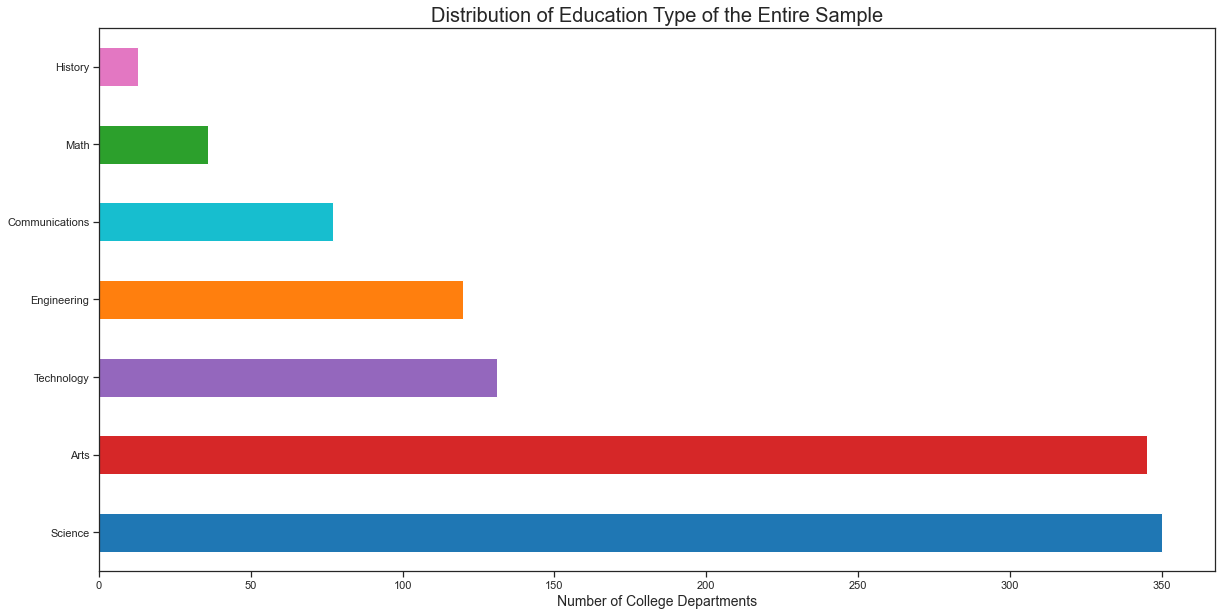

In [116]:
import matplotlib
df_main['education type'].value_counts().plot(kind='barh', figsize=(20,10), \
                                              color=('tab:blue', 'tab:red', 'tab:purple', 'tab:orange', 'tab:cyan', 'tab:green', 'tab:pink'),\
                                             )
mpl.rc('xtick', labelsize=14)     
mpl.rc('ytick', labelsize=14)
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt.title("Distribution of Education Type of the Entire Sample", fontdict = {'fontsize' : 20})
plt.xlabel("Number of College Departments", fontdict={'fontsize' : 14})

plt.savefig('figure1.jpg')  

### Bar Chart of Academic Type Distribution by Region

In [117]:
## prepping data for histogram
## this is purely for visualizing data (tranpose making displaying look better)
df_transpose= df_percent.transpose() 
df_transpose= df_transpose.drop('Total', axis=0)
df_transpose= df_transpose.drop('Total', axis=1)
df_transpose

Region,East,West
Arts,0.1670,0.1549
Communications,0.0373,0.0345
Engineering,0.0504,0.0616
History,0.0056,0.0065
Math,0.0187,0.0149
Science,0.1623,0.1642
Technology,0.0569,0.0653


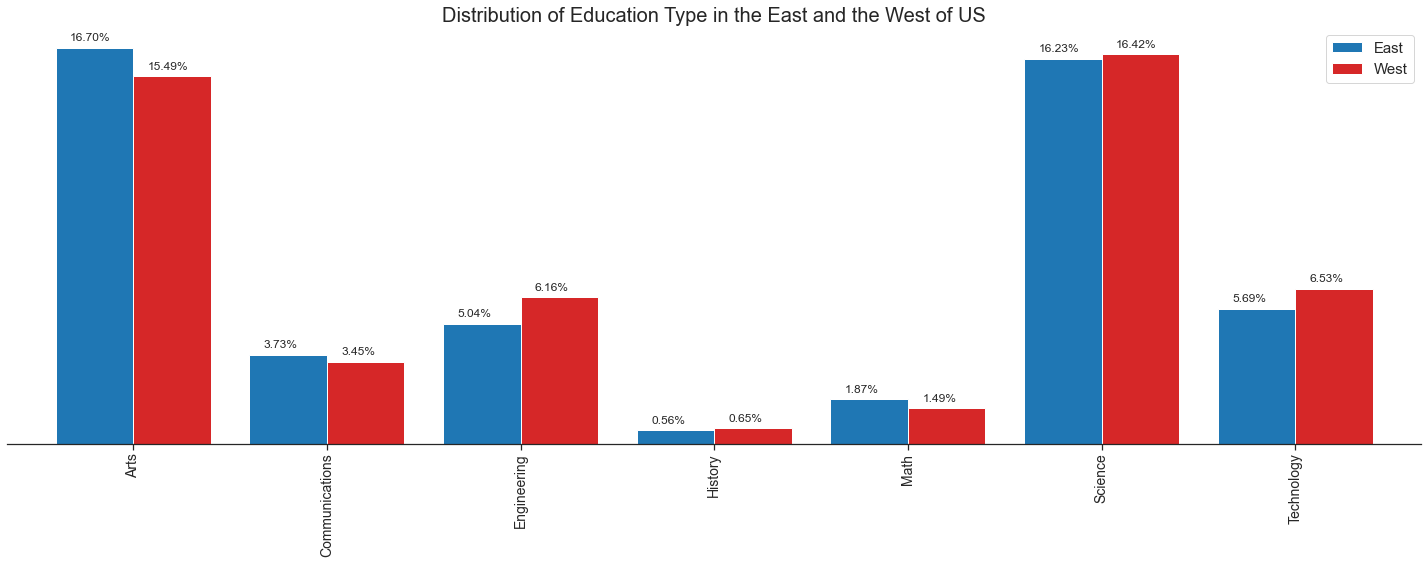

In [118]:
## color list (ordered)
colorsc= ["tab:blue", "tab:red", "tab:purple"]

# will use colors from the list above
ax = df_transpose.plot(kind='bar', alpha=1, figsize=(20, 8), width=0.8,
                 fontsize = 14,
                 color= colorsc)

# remove left, right and top "borders"
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
# removing y-axes label and numbers
ax.tick_params(left=False)
ax.axes.yaxis.set_ticklabels([])

# displaying percentage on each histogram bar:
for p in ax.patches:
    ax.annotate("{:.2%}".format(p.get_height()),           
                
                #this will first get rectangle bar height value, then "{:.2%}".format(value) will convert value to percentage
                # get_height returns the height of the rectangle
                # get_x returns the left coord of the rectangle.
                
                xy=(p.get_x()+0.074, p.get_height()+0.003))  
                #get the coordinates to put "values", we offset by horizontal+0.02 and height+0.01 for more a better looking graph

ax.legend(fontsize = 15)
ax.set_title("Distribution of Education Type in the East and the West of US", {'fontsize': 20})
plt.tight_layout()
plt.savefig('figure2.jpg')  

In [119]:
df_main.head()

,name,categories,lat,lng,city,state,education type,region
0,The Juilliard School,College Arts Building,40.773749,-73.982829,New York,NY,Arts,East
1,The New School for Drama,College Arts Building,40.736173,-74.009327,New York,NY,Arts,East
2,Dorothy Young Center For The Arts,College Arts Building,40.763560,-74.424895,Madison,NJ,Arts,East
3,Collaborative Arts Project 21 (CAP21),College Arts Building,40.739046,-73.993140,New York,NY,Arts,East
4,Brookdale Performing Arts Center,College Arts Building,40.326948,-74.133983,Lincroft,NJ,Arts,East


In [120]:
## prepping for map display
df_map = df_main.copy()
df_map['color']='other'
df_map.loc[df_map['education type'] == 'Arts', 'color'] = 'red' 
df_map.loc[df_map['education type'] == 'Science', 'color'] = 'blue' 
df_map.loc[df_map['education type'] == 'History', 'color'] = 'pink' 
df_map.loc[df_map['education type'] == 'Technology', 'color'] = 'purple' 
df_map.loc[df_map['education type'] == 'Engineering', 'color'] = 'orange' 
df_map.loc[df_map['education type'] == 'Communications', 'color'] = 'cyan'
df_map.loc[df_map['education type'] == 'Math', 'color'] = 'green' 

print(df_map['color'].unique())
df_map.head()

['red' 'purple' 'blue' 'cyan' 'pink' 'green' 'orange']


,name,categories,lat,lng,city,state,education type,region,color
0,The Juilliard School,College Arts Building,40.773749,-73.982829,New York,NY,Arts,East,red
1,The New School for Drama,College Arts Building,40.736173,-74.009327,New York,NY,Arts,East,red
2,Dorothy Young Center For The Arts,College Arts Building,40.763560,-74.424895,Madison,NJ,Arts,East,red
3,Collaborative Arts Project 21 (CAP21),College Arts Building,40.739046,-73.993140,New York,NY,Arts,East,red
4,Brookdale Performing Arts Center,College Arts Building,40.326948,-74.133983,Lincroft,NJ,Arts,East,red


### Map of sample data points

### US

In [121]:
# loop through each department and add to graph
# create map and display it
us_map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)
for lat, lng, educ, city, cl in zip(df_map['lat'], df_map['lng'], df_map['education type'], df_map['city'], df_map['color']):
    folium.CircleMarker(
        [lat, lng],
        radius=5, # define how big the circle markers are
        color=cl,
        fill=True,
        popup =folium.Popup('City: ' + str(city).capitalize() + '<br>'
                 'Department Type: ' + str(educ),
                 max_width=500
                ),
        fill_color=cl,
        fill_opacity=0.6
    ).add_to(us_map)

# show map
# please zoom in and click on a circle to learn more about the college department
us_map

### Western US

In [122]:
us_west = folium.Map(location=[38.7783, -114.4179], zoom_start=5)
df_map_west=df_map[df_map['region'].isin(['West'])].reset_index(drop=True)

for lat, lng, city, educ, cl in zip(df_map_west['lat'], df_map_west['lng'], df_map_west['city'], df_map_west['education type'], df_map_west['color']):
    folium.CircleMarker(
        [lat, lng],
        radius=6, # define how big you want the circle markers to be
        color=cl,
        popup =folium.Popup('City: ' + str(city).capitalize() + '<br>'
                 'Department Type: ' + str(educ),
                 max_width=500
                ),
        fill=True,
        fill_color=cl,
        fill_opacity=0.5
    ).add_to(us_west)

# show map
us_west

### Eastern US

In [123]:
us_east = folium.Map(location=[41.2994, -74.2179], zoom_start=6)
df_map_east=df_map[df_map['region'].isin(['East'])].reset_index(drop=True)

for lat, lng, city, educ, cl in zip(df_map_east['lat'], df_map_east['lng'], df_map_east['city'], df_map_east['education type'], df_map_east['color']):
    folium.CircleMarker(
        [lat, lng],
        radius=6, # define how big you want the circle markers to be
        color=cl,
        popup = folium.Popup('City: ' + str(city).capitalize() + '<br>'
                 'Department Type: ' + str(educ),
                max_width=500
                ),
        fill=True,
        fill_color=cl,
        fill_opacity=0.5
    ).add_to(us_east)

# show map
us_east

### **PART 4: Inferential Statistics (Chi-Squared test for independence)**

The data set obtained from Foursquare API fits into two main categorical variables: two regions (East or West) and type of education (one of the eight categories). From the previous sections, I have also manipulated data into an appropriate contigency tables displaying the frequency distribution of the interested variables. For more information about the contigency table, please refer to this [Wikipedia article on Contigency table](https://en.wikipedia.org/wiki/Contingency_table)
<br>
For the following analysis, I am interested in learning whether there is a difference in the distribution of "higher education type" across two Western and Eastern regions of the United States. Therefore, I think it is appropriate to conduct the Chi-square test for independence with the main categorical variables of interest as region and higher education type. 

Before we proceed with the Chi-square test for independence, let's ensure that all of the following three conditions are sastified
* The sampling method follows simple random sampling.
* The studied variables are all categorical.
* For the sample data displayed in the contingency table, the expected frequency count cannot be less than 5.

more resources [here](https://www.pythonfordatascience.org/chi-square-test-of-independence-python)

#### Contigency Table from the original data

In [124]:
df_contigency=df_final.drop('Total', axis=0)
df_contigency=df_contigency.drop('Total', axis=1)
df_contigency.style.set_precision(0)

,Arts,Communications,Engineering,History,Math,Science,Technology
Region,,,,,,,
East,179,40,54,6,20,174,61
West,166,37,66,7,16,176,70


#### Expected Frequency Table from the original data
For more information on how to calculate: please refer to this article

In [125]:
from scipy.stats.contingency import expected_freq
array_e = expected_freq(df_contigency)
col_list = ('Arts', 'Communications', 'Engineering', 'History', 'Math', 'Science', 'Technology')
df_expected = pd.DataFrame(array_e, columns=col_list, index=df_contigency.index)
df_expected

,Arts,Communications,Engineering,History,Math,Science,Technology
Region,,,,,,,
East,171.856343,38.356343,59.776119,6.475746,17.932836,174.347015,65.255597
West,173.143657,38.643657,60.223881,6.524254,18.067164,175.652985,65.744403


In [126]:
df_expected.to_csv('table2.csv')

Next, we check if our data sample truly satifies the assumptions before proceeding to perform the Chi-square test. 
* As stated in the motivation section, I chose these populated cities from the Wikipedia's list of most populous cities in the U.S. There is no reason to believe that the sampling process is not random. More specifically, we take the main analysis of this study into consideration: the main goal is to examine whether there is a difference in the academic type frequency of higher education between the two regions in the U.S. In addition, population is less likely to impact (at least not directly) the academic type distribution. Therefore, my methods of choosing college buildings/departments (samples) are not biased to the outcomes of education type distribution.
* It is natural that our data has a set of nominal (categorical) variables: regions and education type
* From the contigency table, it seems that all the expected frequency cells are larger than 5. 

Therefore, with all the assumptions satisfied, we can continue with the Chi-square test for independence between the two US regions.

**Hypothesis**
<br>

The main hypothesis I am interested in testing is to study whether academic type distribution of the universities from the two regions, East and West of USA, is independent. Precisely, the chi-square test of independence will tell us if we can understand the frequency of education type of one region knowing the academic distribution of the other region.
<br>

The hypotheses are as follows:

* $H_o$: Distribution of higher education type is different between East and West regions
* $H_a$: Distribution of higher education type is the same between East and West regions

**Analysis Plan**
<br>

The degree of freedoms has the following formula:
DF = (r - 1) * (c - 1) 

where:
* r is the number of categories of the first variable (region)
* c is the number of cateogires of the second variable (education type)

so in our sample: DF = $(2-1)*(7-1) = 6$
<br>
The expected frequency cell has the following formula:
$E_\text{r,c} = \frac{(n_r * n_c)}{n}$
<br>
And finally, the formula for Chi-square statistics is:
$ X^2 = \frac{(O_\text{r,c} - E_\text{r,c})^2}{E_\text{r,c}} $

**Decision rules:**
<br>

We will reject the null hypothesis $H_o$ if the calculated test statistic is larger the critical value based on the degrees of freedom and level. Alternatively, we can also reject the null hypothesis if the p-value obtained from the test statistics is sufficiently small relative to the chosen siginificance level.

#### **Results**

From the chi-square package, the Chi-square statistics is 2.94 and p-value is 0.82. Therefore, for all significance levels: 0.01, 0.05 and 0.1, we do not have sufficient evidence to reject the null hypothesis in favor of the alternive. In other words, there is enough evidence to suggest that the distribution of higher education type is different (independent) between the East and the West regions of the United States. Cramer's V also measures the strength of the relationship. If it is larger than 0.15, the relationship between two interested variables (region and academic type distribution) is strong.
<br>

In [127]:
df_main.head()
display(df_main.shape)

(1072, 8)

In [128]:
crosstab, test_results, expected= researchpy.crosstab(df_main['region'], df_main['education type'], test= "chi-square", expected_freqs= True, prop= "cell")
# note: we already have expected and crosstab tables. I only store for clarification and comparison

In [129]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 6.0) =,2.9430
1,p-value =,0.8160
2,Cramer's V =,0.0524


In [130]:
# scipy.stats also yields the same results, albeit with "ugly" tables
# from scipy.stats import chi2_contingency
# scipy.stats.chi2_contingency(df_contigency, correction=True, lambda_=None)

### **PART 5: Analyzing by Cities**

In [131]:
display(df_onehot.shape)
df_onehot["City-State"] = df_onehot["City"] + "-" +df_onehot["State"]
df_onehot.head()

(1072, 10)

,Region,City,State,Arts,Communications,Engineering,History,Math,Science,Technology,City-State
0,East,New York,NY,1,0,0,0,0,0,0,New York-NY
1,East,New York,NY,1,0,0,0,0,0,0,New York-NY
2,East,Madison,NJ,1,0,0,0,0,0,0,Madison-NJ
3,East,New York,NY,1,0,0,0,0,0,0,New York-NY
4,East,Lincroft,NJ,1,0,0,0,0,0,0,Lincroft-NJ


In [132]:
df_onehot['City-State'].nunique()

257

In [133]:
metric_cols = ['Region']

In [134]:
## groupby aggregate to keep region
df_city = df_onehot.groupby(('City-State')).agg({'City-State': lambda x: x.iloc[0], 'Region': 'first', 
                        'Arts':'mean','Communications':'mean','Engineering':'mean','History':'mean','Math':'mean','Science':'mean','Technology':'mean' })

## aggregate function to pass the arguments for each variable
# first: first observation of the group. Ex: I groupby City-State, the first obs in region X -> X will be displayed as Region

In [135]:
df_city.reset_index(drop=True, inplace=True)
df_city.head(20)

,City-State,Region,Arts,Communications,Engineering,History,Math,Science,Technology
0,1-MD,East,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
1,Alexandria-VA,East,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Allentown-PA,East,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Annandale-VA,East,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
4,Annapolis-MD,East,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000
5,Aptos-CA,West,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
6,Arlington-VA,East,0.333333,0.000000,0.333333,0.000000,0.000000,0.000000,0.333333
7,Arnold-MD,East,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.750000
8,Auburn-WA,West,0.250000,0.000000,0.000000,0.000000,0.000000,0.500000,0.250000
9,Azusa-CA,West,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [136]:
display(df_city.shape)

(257, 9)

In [137]:
## manually cleaning some city data
df_city['City-State'] = df_city['City-State'].str.replace('Washington-D.C.', 'Washington-DC')
df_city['City-State'] = df_city['City-State'].str.replace('1', 'College Park')

In [138]:
df_city = df_city.sort_values(by ='City-State').reset_index(drop=True)

In [139]:
df_city.head()

,City-State,Region,Arts,Communications,Engineering,History,Math,Science,Technology
0,Alexandria-VA,East,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Allentown-PA,East,0.5,0.5,0.0,0.0,0.0,0.0,0.0
2,Annandale-VA,East,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Annapolis-MD,East,0.0,0.5,0.5,0.0,0.0,0.0,0.0
4,Aptos-CA,West,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [140]:
df_info.head()

,city,state,lat_city,lng_city,population,density
0,South Creek,WA,46.9994,-122.3921,2500.0,125.0
1,Roslyn,WA,47.2507,-121.0989,947.0,84.0
2,Sprague,WA,47.3048,-117.9713,441.0,163.0
3,Gig Harbor,WA,47.3352,-122.5968,9507.0,622.0
4,Lake Cassidy,WA,48.0639,-122.0920,3591.0,131.0


In [141]:
df_info['City-State']=df_info['city']+'-'+df_info['state']
df_info.head()

,city,state,lat_city,lng_city,population,density,City-State
0,South Creek,WA,46.9994,-122.3921,2500.0,125.0,South Creek-WA
1,Roslyn,WA,47.2507,-121.0989,947.0,84.0,Roslyn-WA
2,Sprague,WA,47.3048,-117.9713,441.0,163.0,Sprague-WA
3,Gig Harbor,WA,47.3352,-122.5968,9507.0,622.0,Gig Harbor-WA
4,Lake Cassidy,WA,48.0639,-122.0920,3591.0,131.0,Lake Cassidy-WA


In [142]:
df_geo=df_info[['City-State','lat_city','lng_city', 'population', 'density']]
df_geo.head()

,City-State,lat_city,lng_city,population,density
0,South Creek-WA,46.9994,-122.3921,2500.0,125.0
1,Roslyn-WA,47.2507,-121.0989,947.0,84.0
2,Sprague-WA,47.3048,-117.9713,441.0,163.0
3,Gig Harbor-WA,47.3352,-122.5968,9507.0,622.0
4,Lake Cassidy-WA,48.0639,-122.0920,3591.0,131.0


In [143]:
df_merged = df_geo.copy() ## make a copy and merge to df_city for a complete data set ready for analysis
df_merged= df_city.join(df_geo.set_index('City-State'), on='City-State')

In [144]:
df_merged.head()

,City-State,Region,Arts,Communications,Engineering,History,Math,Science,Technology,lat_city,lng_city,population,density
0,Alexandria-VA,East,1.0,0.0,0.0,0.0,0.0,0.0,0.0,38.8185,-77.0861,160035.0,4137.0
1,Allentown-PA,East,0.5,0.5,0.0,0.0,0.0,0.0,0.0,40.5961,-75.4755,682899.0,2668.0
2,Annandale-VA,East,0.0,0.0,0.0,0.0,0.0,1.0,0.0,38.8324,-77.1960,44504.0,2189.0
3,Annapolis-MD,East,0.0,0.5,0.5,0.0,0.0,0.0,0.0,38.9706,-76.5047,39321.0,2106.0
4,Aptos-CA,West,0.0,0.0,0.0,0.0,0.0,1.0,0.0,36.9912,-121.8934,5775.0,338.0


In [145]:
# detecting missing values, this is helpful in creating the 'na_filling.csv' file from my Github
# some incorporated towns are not listed, so I mannually filled in the data through 'na_filling.csv'
is_NaN = df_merged.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df_merged[row_has_NaN].reset_index(drop=True)
rows_with_NaN.head()

,City-State,Region,Arts,Communications,Engineering,History,Math,Science,Technology,lat_city,lng_city,population,density
0,Bayside-NY,East,0.666667,0.0,0.0,0.0,0.0,0.333333,0.0,NaN,NaN,NaN,NaN
1,Blue Oaks-VA,East,1.000000,0.0,0.0,0.0,0.0,0.000000,0.0,NaN,NaN,NaN,NaN
2,Branchburg Township-NJ,East,1.000000,0.0,0.0,0.0,0.0,0.000000,0.0,NaN,NaN,NaN,NaN
3,Bristol-RI,East,0.000000,1.0,0.0,0.0,0.0,0.000000,0.0,NaN,NaN,NaN,NaN
4,Brookline-MA,East,0.000000,0.0,0.5,0.0,0.0,0.000000,0.5,NaN,NaN,NaN,NaN


In [146]:
## loading 'na_filling.csv'
df_naf = pd.read_csv('https://raw.githubusercontent.com/putalo/IBM-project/master/na_filling.csv',header=0, thousands=',') 
# this to help format numbers 1,000 as 1000 (if not it will appear as an object instead of float)
display(df_naf.shape)
df_naf

(46, 5)

,City-State,lat_city,lng_city,population,density
0,Bayside-NY,40.7600,-73.7700,43808.0,5800.000000
1,Blue Oaks-VA,38.8200,-77.3080,NaN,NaN
2,Branchburg Township-NJ,40.5604,-74.7147,14459.0,278.500000
3,Bristol-RI,41.6771,-71.2662,22954.0,876.100000
4,Brookline-MA,42.3318,-71.1212,58732.0,3337.000000
5,Chatsworth-CA,34.2506,-118.6148,41255.0,888.000000
6,Cheyney-PA,39.9335,-75.5254,1130.0,690.000000
7,Danvers-MA,42.5700,-70.9370,27400.0,283.011583
8,Durham-NH,43.1300,-70.9200,14638.0,227.799316
9,Eagle Rock-CA,34.1490,-118.2130,34644.0,3100.000000


In [147]:
# merges df_city_final with the df_naf file to fill missing values
df_city_final= df_merged.set_index("City-State").combine_first(df_naf.set_index("City-State")).reset_index()

### Dealing with NA values of some cities/towns
Since I was unable to get data from unincorporated cities/towns from the US (which do not have a government/non-municipality), I will fill in the missing values with data from larger area covering the cities/towns. For example, Blue Oaks of Virginia is included in Fairfax County of Virginia. So I will get the data from Fairfax to replace that of Blue Oaks

In [148]:
# Blue Oaks-VA (using Fairfax-VA county): pop: 1,081,726/ dens: 1000
# Purchase-NY (using Harrison town): density: 1,726.29
# Valencia-CA row density (using Santa Clarita city (which includes Valencia)): density: 1,162.20

df_city_final.loc[df_city_final['City-State']== 'Blue Oaks-VA', 'population']= 1081726
df_city_final.loc[df_city_final['City-State']== 'Blue Oaks-VA', 'density']= 1000
df_city_final.loc[df_city_final['City-State']== 'Valencia-CA', 'density']= 1162
df_city_final.loc[df_city_final['City-State']== 'Purchase-NY', 'density']= 1726.29

In [149]:
df_city_final.dtypes

City-State         object
Arts              float64
Communications    float64
Engineering       float64
History           float64
Math              float64
Region             object
Science           float64
Technology        float64
density           float64
lat_city          float64
lng_city          float64
population        float64
dtype: object

Finally, I added a area size of a city or town using variables population and density where: $\text{size}=\frac{\text{population}}{\text{density}}$. The sole reason is for easy interpretation. 

In [150]:
df_city_final['size']=df_city_final['population']/df_city_final['density']
df_city_final=df_city_final.drop(['density'], axis=1)

### **PART 6: Multinomial Logistic Regression**

For more information about the technical steps for performing multinomial logistic regression, I include the following resources for the purpose of learning
* General guide to perform the regression using Python, including how to add an intercept to the original model. [Link](https://statcompute.wordpress.com/2013/08/23/multinomial-logit-with-python/)
* Different multinmomial regression results between scikit and statsmodels? It's due to the intercept and/or regularization parameter of scikit! [Link](https://stats.stackexchange.com/questions/203740/logistic-regression-scikit-learn-vs-statsmodels) 
* Interpretation of the regression table: [Link](https://stats.idre.ucla.edu/spss/output/multinomial-logistic-regression/)

In [7]:
df_city_final.head()

,City-State,Arts,Communications,Engineering,History,Math,Region,Science,Technology,density,lat_city,lng_city,population,size
0,Alexandria-VA,1.0,0.0,0.0,0.0,0.0,East,0.0,0.0,4137.0,38.8185,-77.0861,160035.0,38.683829
1,Allentown-PA,0.5,0.5,0.0,0.0,0.0,East,0.0,0.0,2668.0,40.5961,-75.4755,682899.0,255.959145
2,Annandale-VA,0.0,0.0,0.0,0.0,0.0,East,1.0,0.0,2189.0,38.8324,-77.1960,44504.0,20.330745
3,Annapolis-MD,0.0,0.5,0.5,0.0,0.0,East,0.0,0.0,2106.0,38.9706,-76.5047,39321.0,18.670940
4,Aptos-CA,0.0,0.0,0.0,0.0,0.0,West,1.0,0.0,338.0,36.9912,-121.8934,5775.0,17.085799


In [8]:
df_city1=df_city.drop('Region', axis=1)

The following codes are from IBM Data Science Capstone that will return the most popular academic category for each city/town

In [9]:
def return_most_common_type(row, num_top_type):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_type]

In [10]:
## dataframe displaying top venues
num_top_type = 1
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City-State']
for ind in np.arange(num_top_type):
    try:
        columns.append('{}{} Most Common Education Type'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Education Type'.format(ind+1))

# create a new dataframe
df_rank = pd.DataFrame(columns=columns)
df_rank['City-State'] = df_city1['City-State']

for ind in np.arange(df_city1.shape[0]):
    df_rank.iloc[ind, 1:] = return_most_common_type(df_city1.iloc[ind, :], num_top_type)

df_rank.head(20)

,City-State,1st Most Common Education Type
0,Alexandria-VA,Arts
1,Allentown-PA,Communications
2,Annandale-VA,Science
3,Annapolis-MD,Engineering
4,Aptos-CA,Science
5,Arlington-VA,Technology
6,Arnold-MD,Technology
7,Auburn-WA,Science
8,Azusa-CA,Arts
9,Baltimore-MD,Science


In [11]:
df_rank.shape

(257, 2)

In [12]:
df_city_final.head()

,City-State,Arts,Communications,Engineering,History,Math,Region,Science,Technology,density,lat_city,lng_city,population,size
0,Alexandria-VA,1.0,0.0,0.0,0.0,0.0,East,0.0,0.0,4137.0,38.8185,-77.0861,160035.0,38.683829
1,Allentown-PA,0.5,0.5,0.0,0.0,0.0,East,0.0,0.0,2668.0,40.5961,-75.4755,682899.0,255.959145
2,Annandale-VA,0.0,0.0,0.0,0.0,0.0,East,1.0,0.0,2189.0,38.8324,-77.1960,44504.0,20.330745
3,Annapolis-MD,0.0,0.5,0.5,0.0,0.0,East,0.0,0.0,2106.0,38.9706,-76.5047,39321.0,18.670940
4,Aptos-CA,0.0,0.0,0.0,0.0,0.0,West,1.0,0.0,338.0,36.9912,-121.8934,5775.0,17.085799


In [13]:
df_rank['region']=df_city_final['Region']
df_rank['population']=df_city_final['population']
df_rank['size']=df_city_final['size']
df_rank['lat_city']=df_city_final['lat_city']
df_rank['lng_city']=df_city_final['lng_city']

In [14]:
df_rank.head(20)

,City-State,1st Most Common Education Type,region,population,size,lat_city,lng_city
0,Alexandria-VA,Arts,East,160035.0,38.683829,38.8185,-77.0861
1,Allentown-PA,Communications,East,682899.0,255.959145,40.5961,-75.4755
2,Annandale-VA,Science,East,44504.0,20.330745,38.8324,-77.1960
3,Annapolis-MD,Engineering,East,39321.0,18.670940,38.9706,-76.5047
4,Aptos-CA,Science,West,5775.0,17.085799,36.9912,-121.8934
5,Arlington-VA,Technology,East,229534.0,67.351526,38.8786,-77.1011
6,Arnold-MD,Technology,East,23041.0,28.030414,39.0437,-76.4974
7,Auburn-WA,Science,West,80776.0,76.420057,47.3041,-122.2110
8,Azusa-CA,Arts,West,49864.0,25.044701,34.1386,-117.9124
9,Baltimore-MD,Science,East,2170504.0,744.087761,39.3051,-76.6144


In [15]:
df_rank.describe()

,population,size,lat_city,lng_city
count,2.570000e+02,257.000000,257.000000,257.000000
mean,3.647534e+05,130.133414,39.702861,-94.225818
std,1.608101e+06,386.296033,3.809986,22.723025
min,1.029000e+03,1.433758,33.040400,-123.456500
25%,2.269800e+04,14.787307,37.552200,-119.032200
50%,4.909500e+04,35.221936,39.960100,-77.006400
75%,1.136300e+05,76.420057,41.077500,-74.393300
max,1.935492e+07,3889.370258,48.420200,-70.482000


In [16]:
import seaborn as sns

In [17]:
import matplotlib.pyplot as plt

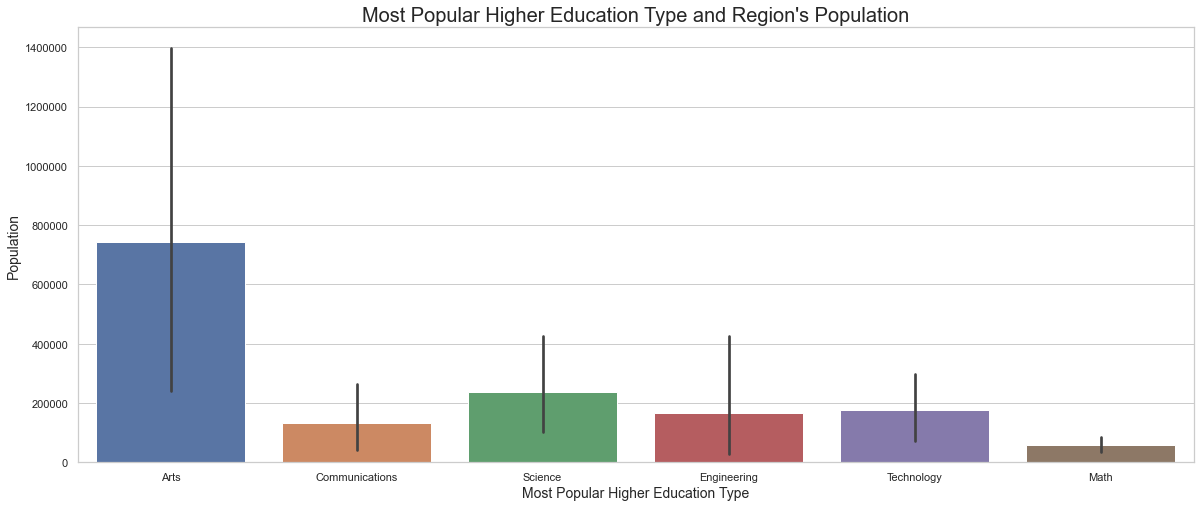

In [18]:
sns.set(style='whitegrid')
#sns.plt.ticklabel_format(style='plain', axis='y',useOffset=False)
plt.figure(figsize=(20, 8))
ax = sns.barplot(x= '1st Most Common Education Type', y='population', data=df_rank)
# to suppress scientific notification: eg 1000000 instead of 1e6
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
ax.set_title("Most Popular Higher Education Type and Region's Population", fontdict = {'fontsize' : 20})
ax.set_ylabel("Population", fontdict = {'fontsize' : 14})
ax.set_xlabel("Most Popular Higher Education Type",  fontdict = {'fontsize' : 14})

plt.savefig('figure4a_population.jpg')  

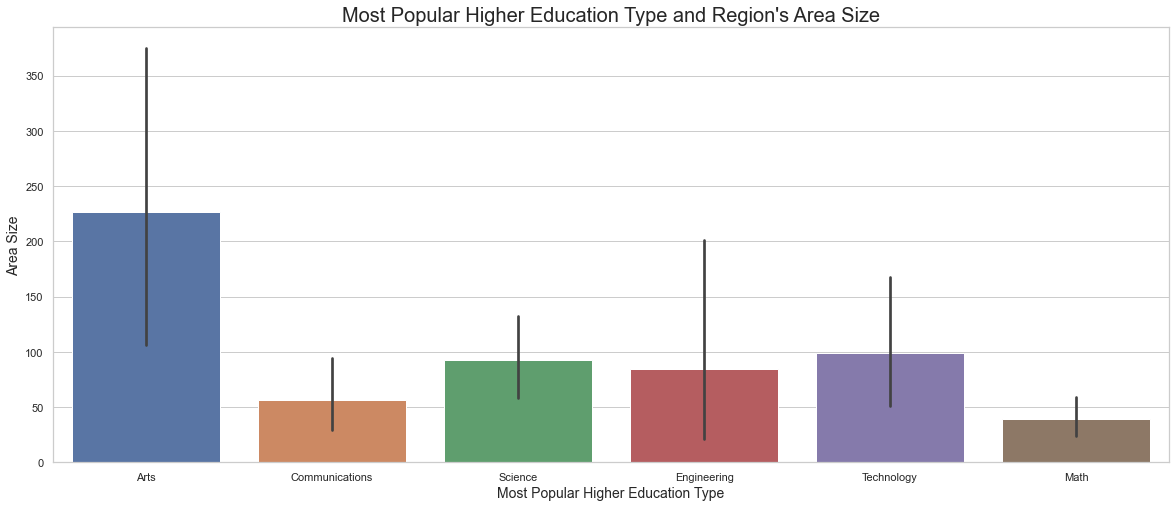

In [19]:
sns.set(style='whitegrid')
plt.figure(figsize=(20, 8))
ax = sns.barplot(x= '1st Most Common Education Type', y='size', data=df_rank)
ax.set_title("Most Popular Higher Education Type and Region's Area Size", fontdict = {'fontsize' : 20})
ax.set_ylabel("Area Size", fontdict = {'fontsize' : 14})
ax.set_xlabel("Most Popular Higher Education Type",  fontdict = {'fontsize' : 14})

plt.savefig('figure4b_size.jpg')  

In [20]:
# changing tyoe of most ocmon education type to 'category'
df_rank['type']=df_rank['1st Most Common Education Type'].astype('category')
df_rank['region']=df_rank['region'].astype('category')

In [21]:
df_rank["west"] = df_rank["region"].cat.codes

In [22]:
df_rank.head(5)

,City-State,1st Most Common Education Type,region,population,size,lat_city,lng_city,type,west
0,Alexandria-VA,Arts,East,160035.0,38.683829,38.8185,-77.0861,Arts,0
1,Allentown-PA,Communications,East,682899.0,255.959145,40.5961,-75.4755,Communications,0
2,Annandale-VA,Science,East,44504.0,20.330745,38.8324,-77.1960,Science,0
3,Annapolis-MD,Engineering,East,39321.0,18.670940,38.9706,-76.5047,Engineering,0
4,Aptos-CA,Science,West,5775.0,17.085799,36.9912,-121.8934,Science,1


In [23]:
df_rank.dtypes

City-State                          object
1st Most Common Education Type      object
region                            category
population                         float64
size                               float64
lat_city                           float64
lng_city                           float64
type                              category
west                                  int8
dtype: object

In [24]:
df_rank['type'].unique()

[Arts, Communications, Science, Engineering, Technology, Math]
Categories (6, object): [Arts, Communications, Science, Engineering, Technology, Math]

In [25]:
import statsmodels.api as st
## adding constant so that the final results will also have the intercept 
y = df_rank[['type']]
x = df_rank[['west', 'population', 'size']]
x = st.add_constant(x, prepend = False)
display(y.head())
display(x.head())

,type
0,Arts
1,Communications
2,Science
3,Engineering
4,Science


,west,population,size,const
0,0,160035.0,38.683829,1.0
1,0,682899.0,255.959145,1.0
2,0,44504.0,20.330745,1.0
3,0,39321.0,18.670940,1.0
4,1,5775.0,17.085799,1.0


In [ ]:
## detecting multicollinearity problems

In [18]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [19]:
## calculatin VIF
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

In [20]:
vif

,VIF Factor,features
0,1.024518,west
1,2.420938,population
2,2.445618,size
3,1.826251,const


Note: a VIF factor of 1 for means there is no correlation between the corresponding variable and the rest. VIF between 1 and 5 is weak correlation (so OK). VIF between 5 and 10 is moderate correlation (also OK-ish for regression purpose). VIF more than 10 is not good.
<br>
So the set of independent variables in our sample is good to go for regression analysis.

In [169]:
mdl = st.MNLogit(y, x)
mdl_fit = mdl.fit()
print(mdl_fit.summary())

Optimization terminated successfully.
         Current function value: 1.440219
         Iterations 10
                          MNLogit Regression Results                          
Dep. Variable:                   type   No. Observations:                  257
Model:                        MNLogit   Df Residuals:                      237
Method:                           MLE   Df Model:                           15
Date:                Wed, 12 Aug 2020   Pseudo R-squ.:                 0.01552
Time:                        11:55:14   Log-Likelihood:                -370.14
converged:                       True   LL-Null:                       -375.97
Covariance Type:            nonrobust   LLR p-value:                    0.7037
type=Communications       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
west                   -0.5787      0.641     -0.903      0.366      -1.835       0.677
p

### Interpretation:
For this multinomial logistic regression fit, we use Arts as a baseline for interpretation and comparison. Using block Science from the results table (the 4th section):
* Intercept – This is the multinomial logit estimate for Science relative to Arts when all the independent variables in the model are evaluated at zero. For the Eastern regions (the variable west is equal to 0) with zero population and area size, the logit for preferring Science to Arts is 0.3269. 

* population – for a person increase in population, the multinomial log-odds of encountering Science to Arts would be expected to decrease while holding other variables constant.

* size – for one kilometer-squared unit increase in area size, the multinomial log-odds of encountering Science to Arts would be expected to decrease by 0.0008 unit while holding other variables constant.

* west – holding other factors constant, western regions tend to have more Science relative to Arts. The multinomial logit estimate is 0.0848.

The rest of the blocks are similar in term of interpretations (using Arts as a baseline for comparison)

### **PART 7: K-means Clustering**

For this part I will perform K-means Clustering, an unsupervised machine learning method of which we allow the programming software Python to independently classify education types into different groups. For simplicity, I will choose 5 groups (K=5). And to easily understand the method, I will also re-code the data into "top three" education categories for each city. The choices are arbitrary.

In [170]:
df_city1.head(3)

,City-State,Arts,Communications,Engineering,History,Math,Science,Technology
0,Alexandria-VA,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Allentown-PA,0.5,0.5,0.0,0.0,0.0,0.0,0.0
2,Annandale-VA,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [171]:
def return_most_common_cat(row, num_top_cat):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_cat]

In [173]:
## dataframe displaying top venues
num_top_cat = 3
indicators = ['st', 'nd', 'rd']
# create columns according to number of top venues
columns = ['City-State']
for ind in np.arange(num_top_cat):
    try:
        columns.append('{}{} Most Common Education Type'.format(ind+1, indicators[ind]))  ## indicators 1st, 2nd, 3rd... if move on -> change to 4th, 5th, etc...
    except:
        columns.append('{}th Most Education Type'.format(ind+1))
# create a new dataframe
df_sorted = pd.DataFrame(columns=columns)
df_sorted['City-State'] = df_city1['City-State']

for ind in np.arange(df_city1.shape[0]):
    df_sorted.iloc[ind, 1:] = return_most_common_cat(df_city1.iloc[ind, :], num_top_cat)

df_sorted.head(3)

,City-State,1st Most Common Education Type,2nd Most Common Education Type,3rd Most Common Education Type
0,Alexandria-VA,Arts,Technology,Science
1,Allentown-PA,Communications,Arts,Technology
2,Annandale-VA,Science,Technology,Math


In [174]:
# set number of clusters
kclusters = 5
df_clustering = df_city1.drop('City-State', 1)
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_clustering)
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 0, 2, 0, 2, 4, 3, 4, 1, 4])

In [175]:
# add clustering labels
df_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
df_sorted.head(3)

,Cluster Labels,City-State,1st Most Common Education Type,2nd Most Common Education Type,3rd Most Common Education Type
0,1,Alexandria-VA,Arts,Technology,Science
1,0,Allentown-PA,Communications,Arts,Technology
2,2,Annandale-VA,Science,Technology,Math


I will perform K-means clustering based on the frenquency of type of academic buildings of my sample on the city level.

In [176]:
df_sorted.loc[df_sorted['Cluster Labels'] == 0]

,Cluster Labels,City-State,1st Most Common Education Type,2nd Most Common Education Type,3rd Most Common Education Type
1,0,Allentown-PA,Communications,Arts,Technology
3,0,Annapolis-MD,Engineering,Communications,Technology
27,0,Brentwood-NY,Communications,Technology,Science
30,0,Bristol-RI,Communications,Technology,Science
44,0,Cheyney-PA,Engineering,Communications,Technology
101,0,Iselin-NJ,Communications,Technology,Science
111,0,La Verne-CA,Communications,Technology,Science
115,0,Lawrenceville-NJ,Technology,Communications,Science
130,0,Manassas-VA,Technology,Communications,Science
136,0,McMinnville-OR,Communications,Arts,Technology


In [177]:
df_sorted.loc[df_sorted['Cluster Labels'] == 1]

,Cluster Labels,City-State,1st Most Common Education Type,2nd Most Common Education Type,3rd Most Common Education Type
0,1,Alexandria-VA,Arts,Technology,Science
8,1,Azusa-CA,Arts,Technology,Science
10,1,Bayside-NY,Arts,Science,Technology
12,1,Bel Air-MD,Arts,Technology,Science
18,1,Beverly-MA,Arts,Technology,Science
19,1,Blackwood-NJ,Arts,Technology,Science
21,1,Blue Oaks-VA,Arts,Technology,Science
24,1,Bowie-MD,Arts,Technology,Science
25,1,Branchburg Township-NJ,Arts,Technology,Science
35,1,Camarillo-CA,Arts,Technology,Science


In [178]:
df_sorted.loc[df_sorted['Cluster Labels'] == 2]

,Cluster Labels,City-State,1st Most Common Education Type,2nd Most Common Education Type,3rd Most Common Education Type
2,2,Annandale-VA,Science,Technology,Math
4,2,Aptos-CA,Science,Technology,Math
14,2,Beltsville-MD,Science,Technology,Math
17,2,Beverly Hills-CA,Science,Technology,Math
23,2,Bothell-WA,Science,Technology,Math
29,2,Bridgewater-MA,Science,Technology,Math
37,2,Camden-NJ,Science,Technology,Math
45,2,Clifton-NJ,Science,Technology,Math
47,2,College Park-MD,Science,Technology,Math
49,2,Compton-CA,Science,Technology,Math


In [179]:
df_sorted.loc[df_sorted['Cluster Labels'] == 3]

,Cluster Labels,City-State,1st Most Common Education Type,2nd Most Common Education Type,3rd Most Common Education Type
6,3,Arnold-MD,Technology,Science,Math
20,3,Blue Bell-PA,Technology,Science,Math
55,3,Diamond Bar-CA,Technology,Science,Math
62,3,Edison-NJ,Technology,Science,Math
63,3,Edmonds-WA,Technology,Science,Math
81,3,Germantown-MD,Technology,Science,Math
88,3,Goodyear-AZ,Technology,Science,Math
90,3,Greenbelt-MD,Technology,Science,Math
94,3,Haverhill-MA,Technology,Science,Math
98,3,Hoboken-NJ,Technology,Science,Math


In [180]:
df_sorted.loc[df_sorted['Cluster Labels'] == 4]

,Cluster Labels,City-State,1st Most Common Education Type,2nd Most Common Education Type,3rd Most Common Education Type
5,4,Arlington-VA,Technology,Engineering,Arts
7,4,Auburn-WA,Science,Technology,Arts
9,4,Baltimore-MD,Science,Arts,Engineering
11,4,Beaverton-OR,Technology,Arts,Science
13,4,Bellevue-WA,Technology,Arts,Math
15,4,Berkeley-CA,Science,Arts,Technology
16,4,Bethlehem-PA,Engineering,Technology,Science
22,4,Boston-MA,Arts,Science,Engineering
26,4,Bremerton-WA,Science,Communications,Arts
28,4,Bridgeport-CT,Technology,Science,Math


## Storing Data Sets

This section is mainly for myself. It helps store and retrieve data efficiently without having to use Foursquare API to search for venues each time I open the notebook

In [81]:
# us cities information
df_info.to_pickle('df_info.pkl')

In [125]:
# information file
# df_info.to_pickle('df_info.pkl')   

In [82]:
# concatenated raw data
# df_east.to_pickle('east.pkl')
# df_west.to_pickle('west.pkl')

In [94]:
# raw dataset from Foursquare API
# df_raw.to_pickle('df_raw.pkl')

In [95]:
# manipulated/changed final data (east and west)
# df_main.to_pickle('df_main.pkl')

In [142]:
# onehot data
# df_onehot.to_pickle('df_onehot.pkl')

In [143]:
# city-level data
# df_city.to_pickle('df_city.pkl')

In [144]:
# rows_with_NaN.to_pickle('df_NA.pkl')

In [145]:
# df_city_final.to_pickle('df_city_final.pkl')

## Exporting Important data

In [181]:
df_raw.to_csv('df_raw.csv')
df_main.to_csv('df_main.csv')

## Loading Up (Stored) Data Sets (as of 8/1/2020)

In [2]:
# main dataset
df_raw= pd.read_pickle('df_raw.pkl')
df_main=pd.read_pickle('df_main.pkl')

# one hot conded data
df_onehot=pd.read_pickle('df_onehot.pkl')

# city-level data
df_city=pd.read_pickle('df_city.pkl')
df_city_final=pd.read_pickle('df_city_final.pkl')

***

## **Section 4: Conclusion**
In summary, I analyzed popular higher education academic type between the western and eastern US using location data provided by Foursquare API and other external resources. Through methods of statistical inference and classification, I find no relationship between a region’s demographic features such as population, area size and location on the academic type frequency of that region. There is also no association on the popularity of universities academic categories between the West and the East of US. I discussed some limitations of the data set and how one should interpret the results appropriately given the scope of this research.
***

## **Section 5: Limitations**
The analysis is mainly for learning and practicing. If interested in interpreting the conclusion of this paper in a meaningful way, please first take into consideration of several limitations of the methodology. The limitation is mainly working with Foursquare API to fetch location data and geospatial analysis. The main downside of working with Foursquare API are the followings:
1. The search result is inconsistent
    * The search algorithm of Foursquare API seems to change/ update as time goes. For example, the results now are different from those a week ago. Due to time and resource constraints, I will leave the results as they were the first time I searched. 
2. Some minor incorrect sub-categorizations of venues
    * Even with detailed documentations such as particular 'categoryId' for each venue, there seems to be irrelevant results mixed in. For example: I got Art gallery in my search for academic building. For the clarity of this analysis, I will simply drop such results.
    * Do also note that Foursquare is entirely built by the community which means anybody can suggest edits or changes to the venues. Hence the labeling is not always correct. 
3. Missing venues
    * This may be an indirect consequence of the two reasons above: some venues are actually there without being documented. However, one good way to remedy this is to input several nearby location's lattitudes and longitudes which can somewhat add more results (albeit with potentially heavy overlapping between results)
Considerations when interpreting multinomial logistic regression results 
* Sample size is the key problem in interpreting the logistic regression results. In particular, the p-value is majorly influenced by sample size. If our hypotheses are actually true (there is really a difference in education type distribution for different regions), then increasing sample size will decrease p-value and we can conclude there is indeed a difference.
* Problems of missing important variables. By omitting other vital demographic factors influencing academic type distribution such as population age, income and gender, the multinomial logit estimates are likely biased. This is entirely due to missing data of many unincorporated towns/cities, or places that do not have a government, which do not have data on the aforementioned variables.

***


## **Section 6: References and Resources**
I would like to thank the following people for providing resources and helpful insights for this analysis, without whom I could not finish the final paper:
* Applied Data Science Capstone (IBM Data Science) lecture notes and discussion threads with many outstanding resources
* Foursquare API. For a list of available categories at Foursquare API, please visit: https://developer.foursquare.com/docs/build-with-foursquare/categories/
* Stackoverflow for technical suggestions
* [statcompute.com](https://statcompute.com) for technical guidance on working with Python
* [simplemaps.com](https://simplemaps.com) for providing demographic data on city-town level